In [18]:
from matplotlib.patches import Circle, Wedge, Polygon
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit
from scipy.stats import linregress
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib as mpl
from scipy import stats
import pandas as pd
import logging, sys
import numpy as np
import statistics
import warnings
import argparse
import datetime
import logging
import shutil
import time
import glob
import math
import sys
import csv
import os


warnings.filterwarnings("ignore")

logging.disable(sys.maxsize)
if not sys.warnoptions:
    warnings.simplefilter("ignore")

logging.disable(sys.maxsize)



### Path to your data

In [19]:
data_dir_base ="/Users/angelicapsaridi/Documents/Geneva/Recommissioning/Data/2022-09-06/" # Raw data stored
output_path = '/Users/angelicapsaridi/Documents/Geneva/Thesis/ECAM/'
os.chdir(data_dir_base)


### Find the LED frames

In [20]:
LED_VG = []
LED_RG = []
LED_BG = []
LED_NG = []
LED_IC = []




for frame in glob.glob("ECAM.*.fits"):
    hdul = fits.open(frame)
    hdr = hdul[0].header 
    if hdr['OBJECT'] == "led" and hdr['FILTER'] == "VG":
            LED_VG.append(hdr['ARCFILE'])
    elif hdr['OBJECT'] == "led" and hdr['FILTER'] == "RG":
            LED_RG.append(hdr['ARCFILE'])
    elif hdr['OBJECT'] == "led" and hdr['FILTER'] == "BG":
            LED_BG.append(hdr['ARCFILE'])
    elif hdr['OBJECT'] == "led" and hdr['FILTER'] == "NG":
            LED_NG.append(hdr['ARCFILE'])
    elif hdr['OBJECT'] == "led" and hdr['FILTER'] == "IC":
            LED_IC.append(hdr['ARCFILE'])
            
print('LED Flats in VG',len(LED_VG))
print('LED Flats in RG',len(LED_RG))
print('LED Flats in BG',len(LED_BG))
print('LED Flats in NG',len(LED_NG))
print('LED Flats in IC',len(LED_IC))

LED Flats in VG 3
LED Flats in RG 0
LED Flats in BG 124
LED Flats in NG 0
LED Flats in IC 0


### Analyzing BG filter

In [24]:
print('Now analyzing BG')
FLUXBG = []
EXPTIMEBG = []
for i in range(len(LED_BG)):
    led = fits.open(LED_BG[i])
    led[0].data = led[0].data[101:4212,101:4196]
    hdr = led[0].header 
    flux = led[0].data
    mean_flux = round(np.mean(flux),3)
    distance_from_mean = abs(flux - mean_flux)
    standard_deviation = round(np.std(flux),3)
    max_deviations = 3
    outlier = distance_from_mean > max_deviations * standard_deviation
    no_outlier = distance_from_mean < max_deviations * standard_deviation
    flux2 = (flux[no_outlier])
    EXPTIMEBG.append(hdr['EXPTIME'])    
    FLUXBG.append(np.mean(flux2))

NORMBG = []
for k in range(len(EXPTIMEBG)):
    NORMBG.append(FLUXBG[k]/EXPTIMEBG[k])

Now analyzing BG


### Plot linearity graph

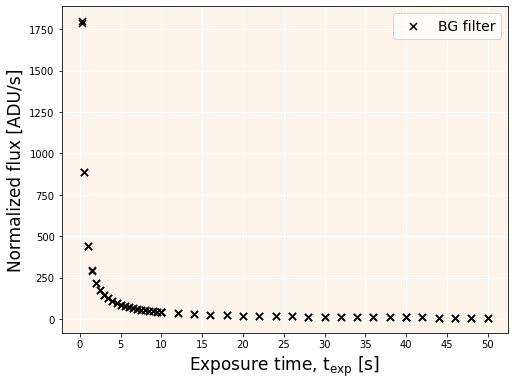

In [26]:
fig = plt.figure(figsize=(8, 6)) 
ax = plt.subplot()
ax.scatter(EXPTIMEBG, NORMBG,color='black',marker='x',zorder=40,s=50,label='BG filter')

ax.legend(fontsize=14)

ax.set_facecolor('antiquewhite')
ax.patch.set_alpha(.5)
ax.grid(color='white', linestyle='-', linewidth=1)
ax.set_ylabel("Normalized flux [ADU/s]",fontsize=17)
ax.set_xlabel(r'Exposure time, t$_{\mathrm{exp}}$ [s]',fontsize=17)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
